<a href="https://colab.research.google.com/github/pojakgol/machine-learning-bootcamp/blob/main/supervised/03_classification/05_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(font_scale=1.3)
np.random.seed(42)

In [2]:
from sklearn.datasets import load_iris

raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = all_data['feature_names']
target_names = all_data['target_names']

In [3]:
df = pd.DataFrame(np.c_[data, target], columns=feature_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
data = data[:, [0, 1]]
target = df['target'].apply(int).values


print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]

[0 0 0 0 0]


In [5]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, random_state=42)


classifier.fit(data, target)

RandomForestClassifier(random_state=42)

In [6]:
classifier.score(data, target)

0.9266666666666666

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


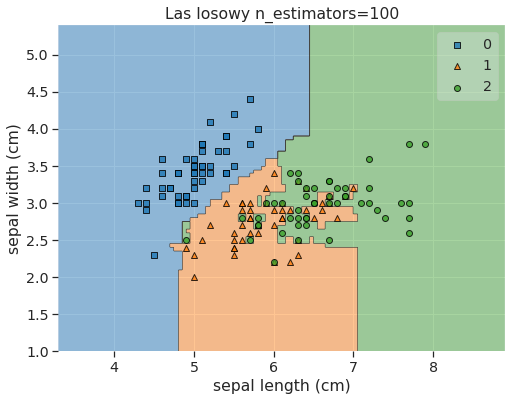

In [7]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 6))
plt.title('Las losowy n_estimators=100')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plot_decision_regions(data, target, classifier)
plt.show()

In [8]:
data = all_data['data']
targets = all_data['target']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

In [10]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

1.0

In [12]:
features = pd.DataFrame(data={'feature': feature_names, 'feature_importance': classifier.feature_importances_})

px.bar(features, x='feature', y='feature_importance', width=700, height=400)